<a href="https://colab.research.google.com/github/yayunl/colab-code/blob/main/hosing_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

**Normalization**  
For each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation


In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
#

**Build the network**

In [6]:
from keras import models
from keras import layers

In [7]:
train_data.shape[1]

13

In [8]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

**Validating using K-fold**    

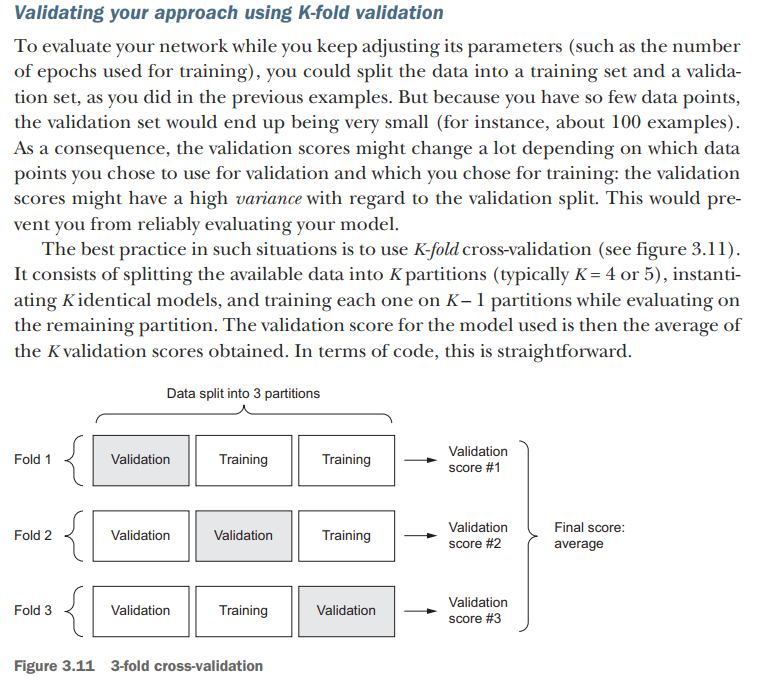

In [23]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        epochs=num_epochs,
                        batch_size=1,
                        verbose=0,
                        validation_data=(val_data, val_targets))
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [10]:
all_scores

[2.0467329025268555, 2.6465935707092285, 2.6846413612365723, 2.520803689956665]

In [24]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

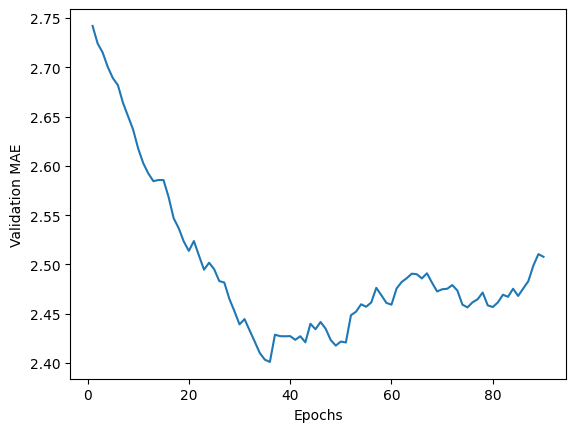

In [25]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**Summary**   

Here’s what you should take away from this example:
1. Regression is done using different loss functions than what we used for classification. Mean squared error (*MSE*) is a loss function commonly used for regression.
2. Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally, the concept of accuracy doesn’t apply for regression. A
common regression metric is mean absolute error (MAE) *italicized text*.
3. When features in the input data have values in different ranges, each feature
should be scaled independently as a preprocessing step.
4. When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
5. When little training data is available, it’s preferable to use a small network with
few hidden layers (typically only one or two), in order to avoid severe overfitting.